<a href="https://www.kaggle.com/code/gowdhamanbj/placement-prediction-classification?scriptVersionId=219028719" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-prediction-dataset/placementdata.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [3]:
df = pd.read_csv('/kaggle/input/placement-prediction-dataset/placementdata.csv')
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [4]:
df.shape

(10000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [6]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [7]:
num_col = df.select_dtypes('number')
num_col.columns.tolist()

['StudentID',
 'CGPA',
 'Internships',
 'Projects',
 'Workshops/Certifications',
 'AptitudeTestScore',
 'SoftSkillsRating',
 'SSC_Marks',
 'HSC_Marks']

In [8]:
non_num_col = df.select_dtypes('object')
non_num_col.columns.tolist()

['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']

In [9]:
df.isna().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

<Axes: >

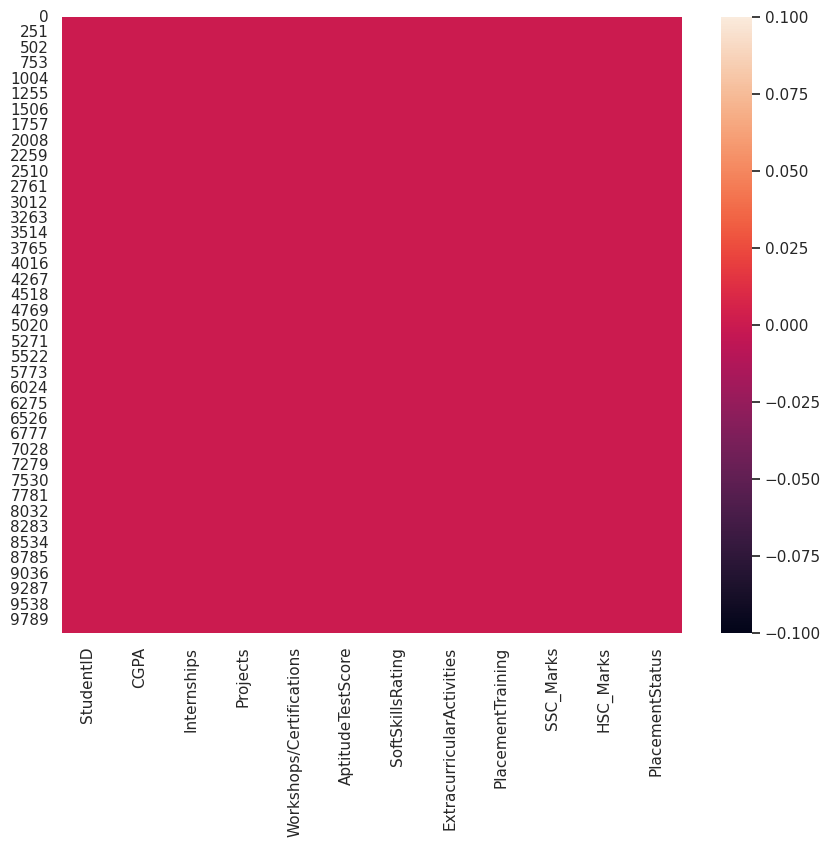

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

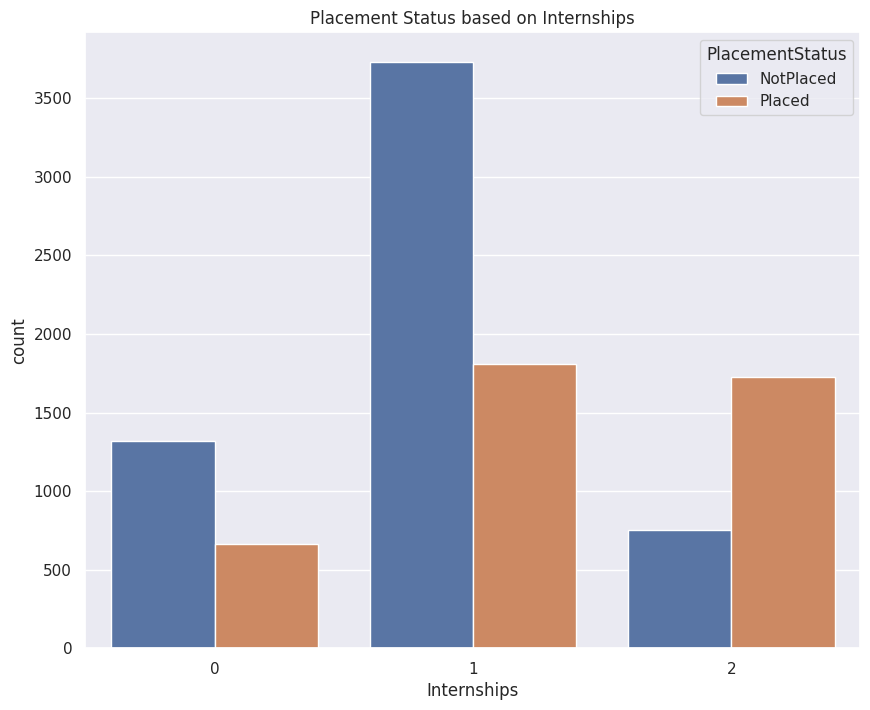

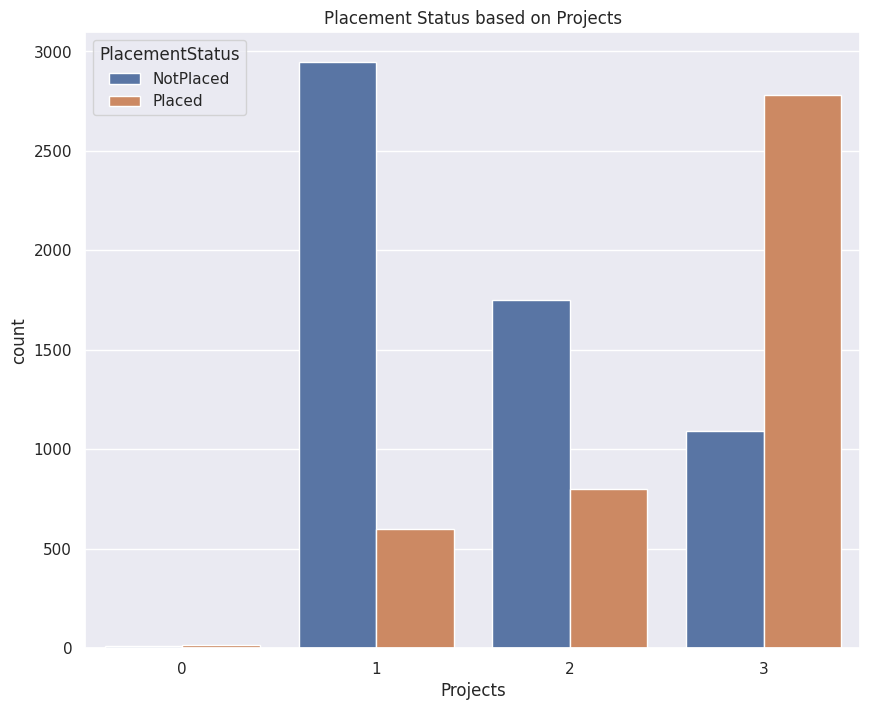

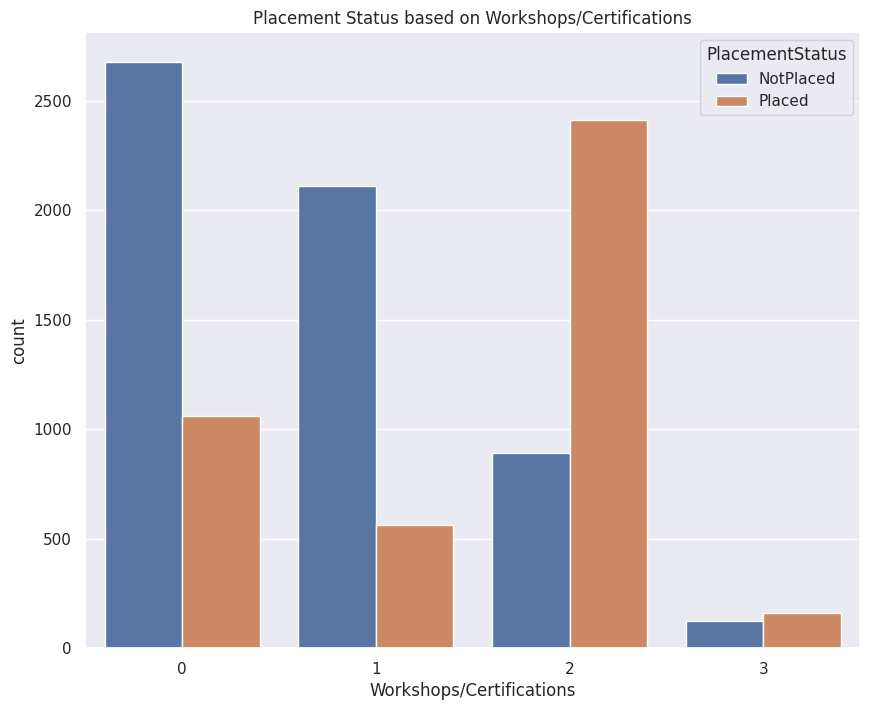

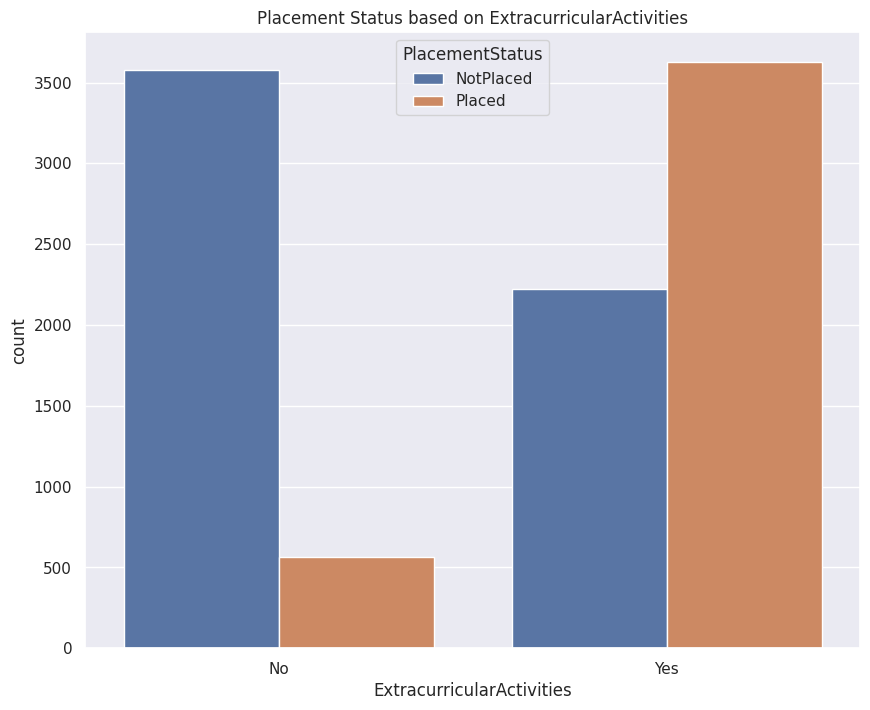

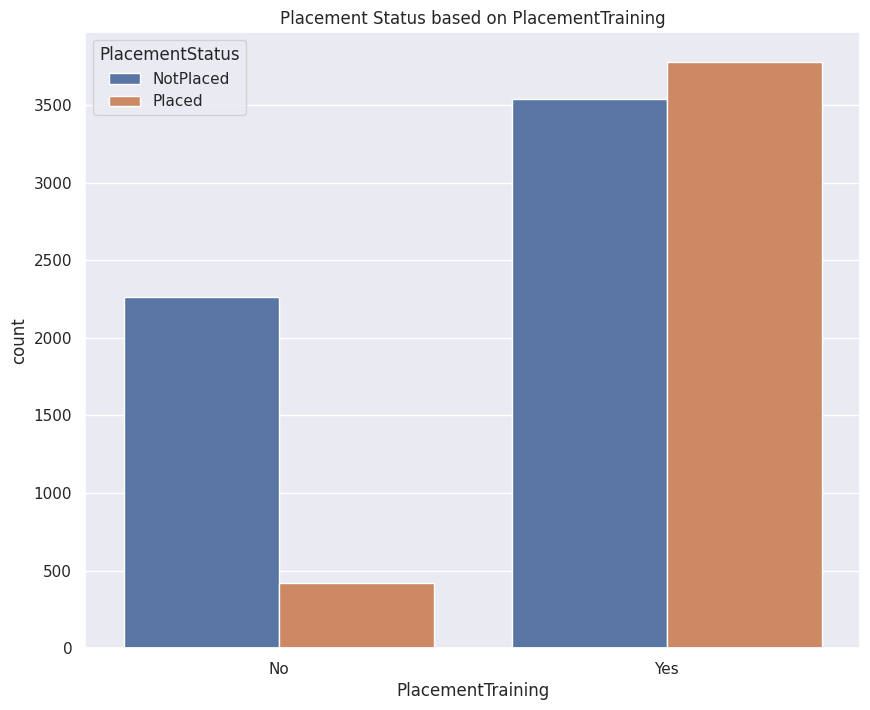

In [11]:
placement_plot = ['Internships','Projects','Workshops/Certifications','ExtracurricularActivities','PlacementTraining']
for graph in placement_plot:
    plt.figure(figsize=(10,8))
    sns.countplot(x=graph, data=df, hue = 'PlacementStatus')
    plt.title(f'Placement Status based on {graph}')

Text(0.5, 1.0, 'Placement Status Distribution')

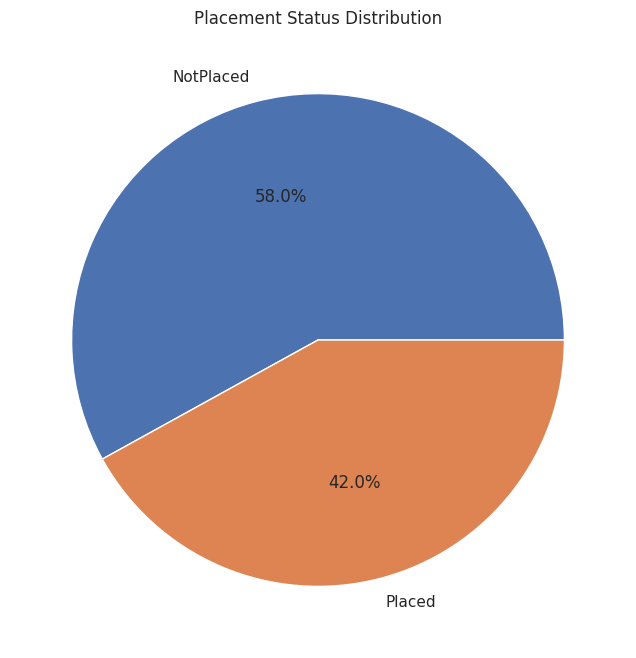

In [12]:
placement_counts = df['PlacementStatus'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(placement_counts, labels=placement_counts.index, autopct='%1.1f%%')
plt.title('Placement Status Distribution')

* 58% of Student's are Not-placed
* 42% of Student's are Placed

In [13]:
df['CGPA'].isna().sum()

0

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='CGPA', ylabel='Count'>

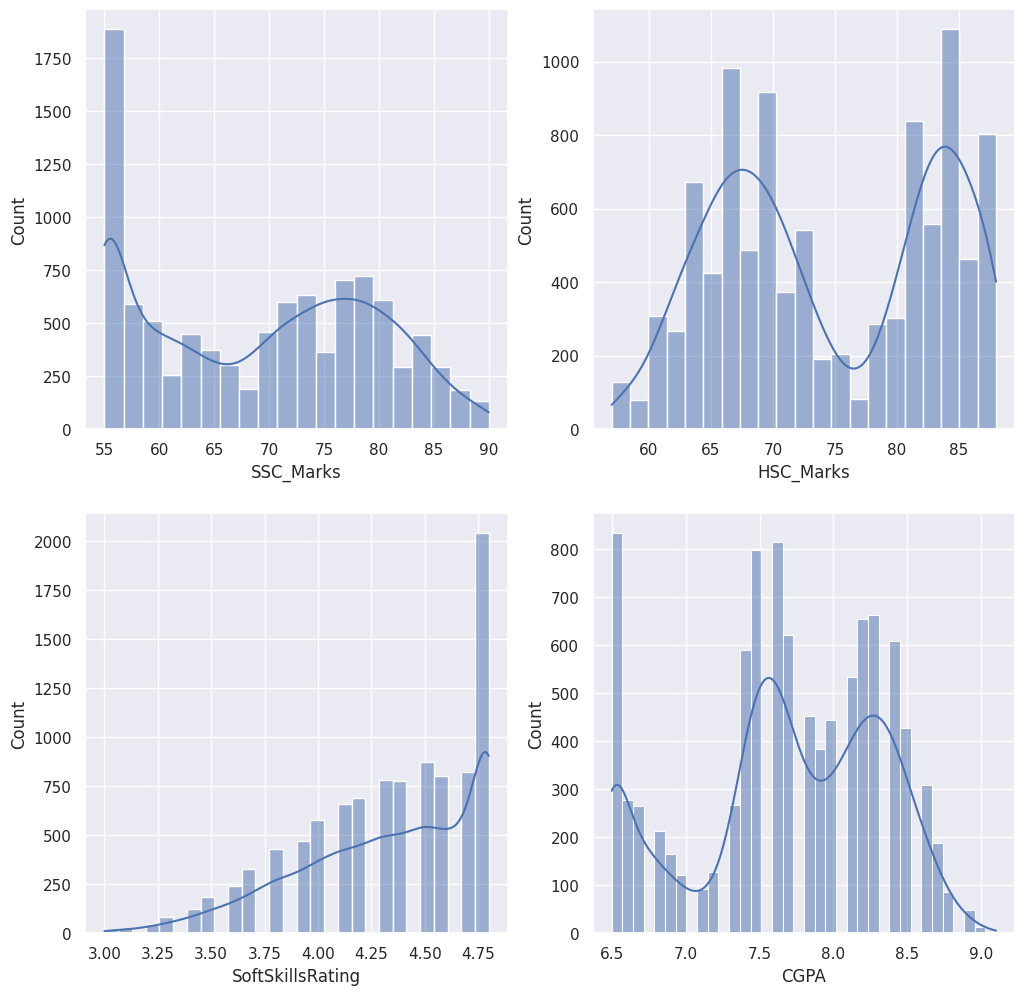

In [14]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
sns.histplot(x='SSC_Marks', data=df, kde=True)

# Second subplot for 'HSC_Marks'
plt.subplot(2, 2, 2)
sns.histplot(x='HSC_Marks', data=df, kde=True)

# Third subplot for 'SoftSkillsRating'
plt.subplot(2, 2, 3)
sns.histplot(x='SoftSkillsRating', data=df, kde=True)

# Fourth subplot for 'CGPA'
plt.subplot(2, 2, 4)
sns.histplot(x='CGPA', data=df, kde=True)


**Representation**
**PlacementStatus**
 * 0 - Not Placed
 * 1 - Placed


**ExtracurricularActivities**
* 0 - No
* 1 - Yes

**PlacementTraining**
* 0 - No
* 1 - Yes

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['PlacementStatus'] = le.fit_transform(df['PlacementStatus'])
df['ExtracurricularActivities'] = le.fit_transform(df['ExtracurricularActivities'])
df['PlacementTraining'] = le.fit_transform(df['PlacementTraining'])
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  int64  
 8   PlacementTraining          10000 non-null  int64  
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


<Axes: >

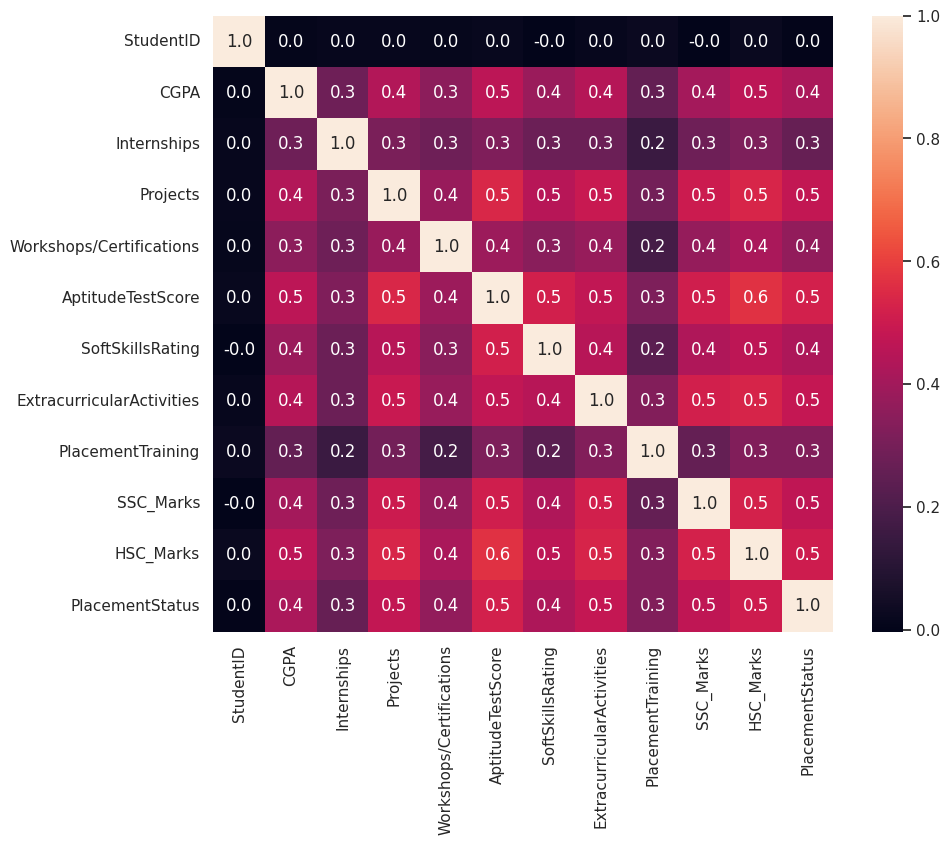

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),fmt='.1f', cbar=True, annot=True)

PlacementStatus
0    5803
1    4197
Name: count, dtype: int64

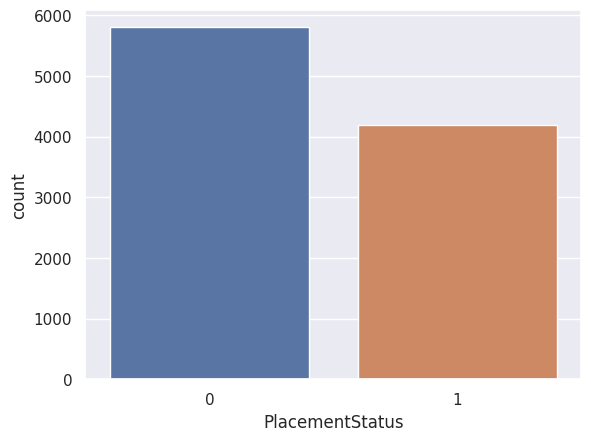

In [18]:
sns.countplot(x=df['PlacementStatus'])
df['PlacementStatus'].value_counts()

* **5803** Student's are Not Placed
* **4197** Student's are Placed

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
def classificationModel(x_train,x_test,y_train,y_test):
    '''print(f'x_train: {x_train.shape}')
    print(f'x_test: {x_test.shape}')    
    print(f'y_train: {y_train.shape}')    
    print(f'y_test: {y_test.shape}')'''

    #StandardScaler
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # List of models to evaluate
    models = [
        RandomForestClassifier(n_estimators=100, criterion='entropy'),        
        LogisticRegression(),  
        SVC(),
        KNeighborsClassifier(n_neighbors=3),
        DecisionTreeClassifier(criterion='entropy'),
        GaussianNB(),
        BernoulliNB(),
    ]
    
    result = []

    for model in models:
        #train model
        model.fit(x_train_scaled,y_train)

        #predict
        predicts = model.predict(x_test_scaled)

        print("Model:", model.__class__.__name__)
        print("Model Accuracy:", accuracy_score(predicts, y_test))
        print(confusion_matrix(predicts, y_test),'Model confusion matrix')
        print(classification_report(predicts, y_test, zero_division=1))
        print(50 * "-")

        result.append(accuracy_score(predicts, y_test))
        
    # Get best model index
    best_model_id = result.index(max(result))
    best_model = models[best_model_id]
    best_model_predict = best_model.predict(x_test_scaled)
    print('---------------------------Best fit model------------------------------------')
    print(best_model, max(result))
    print(80*'-')

In [21]:
x = df.drop(['StudentID','PlacementStatus'], axis=1)
y = df['PlacementStatus']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=1)
classificationModel(x_train,x_test,y_train,y_test)

Model: RandomForestClassifier
Model Accuracy: 0.7945
[[996 215]
 [196 593]] Model confusion matrix
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1211
           1       0.73      0.75      0.74       789

    accuracy                           0.79      2000
   macro avg       0.78      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000

--------------------------------------------------
Model: LogisticRegression
Model Accuracy: 0.808
[[991 183]
 [201 625]] Model confusion matrix
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1174
           1       0.77      0.76      0.76       826

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000

--------------------------------------------------
Model: SVC
Model Accuracy: 0.813
[[1012  194]
 [ 18